In [ ]:
import pandas as pd

path = 'Scrapped_data.csv'
data = pd.read_csv(path)
data.head()

,userName,score,at,content
0,Rifqi Hatta,4,2021-09-18 19:04:43,"Worked as intended, however the notification a..."
1,Stanislaus Setyanto,4,2021-09-15 06:03:24,"At last, the newest apps for tracing covid-19 ..."
2,Bambang Tandjung,1,2021-09-17 06:27:12,"Useless, very unreliable. There are lots of bu..."
3,Player 6,1,2021-09-15 17:06:04,Insists that my phone is rooted when its not. ...
4,Shine A,1,2021-09-30 04:23:15,"Not user-friendly, moreover to elders and plea..."


In [ ]:
data.shape

(9070, 4)

In [ ]:
# Menghilangkan variabel yang tidak dipakai
df_data = data.copy()
df_data = data.drop(columns = ['userName','score','at'])
df_data.head()

,content
0,"Worked as intended, however the notification a..."
1,"At last, the newest apps for tracing covid-19 ..."
2,"Useless, very unreliable. There are lots of bu..."
3,Insists that my phone is rooted when its not. ...
4,"Not user-friendly, moreover to elders and plea..."


## Translate id to en

In [ ]:
#!pip3 uninstall googletrans
#!pip3 install googletrans==3.1.0a0

Found existing installation: googletrans 3.1.0a0
Uninstalling googletrans-3.1.0a0:
  Would remove:
    /usr/local/bin/translate
    /usr/local/lib/python3.7/dist-packages/googletrans-3.1.0a0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/googletrans/*
Proceed (y/n)? y
  Successfully uninstalled googletrans-3.1.0a0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached googletrans-3.1.0a0-py3-none-any.whl


In [ ]:
from googletrans import Translator

translator = Translator()

In [ ]:
df_data['content'] = df_data['content'].apply(translator.translate, src='id', dest='en').apply(getattr, args=('text',))

## Case Folding
Case folding adalah mengubah semua huruf dalam dokumen menjadi huruf kecil

In [ ]:
# case folding
import string
from sklearn.pipeline import Pipeline
import numpy as np
import re
def case_folding(content):
  content = content.lower()                             # mengecilkan huruf
  content = content.strip(' ')                          # menghapus spasi diawal dan diakhir string
  content = re.sub(r'[?|$|.,|!_:)(-+)]', '', content)   # mengganti tanda ?|$ dsb dengan kosong
  content = re.sub(r'\d', '', content)                  # menghapus angka
  content = re.sub('[^\w\s]', '',content)               # menghapus punctuations
  content = re.sub('  ', ' ',content)                   # menghapus dua spasi
  return content
df_data['content'] = df_data['content'].apply(case_folding)
df_data.head()

,content
0,worked as intended however the notification ab...
1,at last the newest apps for tracing covid in i...
2,useless very unreliable there are lots of bugs...
3,insists that my phone is rooted when its not c...
4,not userfriendly moreover to elders and please...


## Tokenizing
Tokenisasi adalah proses untuk membagi teks yang berupa kalimat, paragraf atau dokumen menjadi token-token atau bagian-bagian tertentu.

In [ ]:
def token(content):
  nstr = content.split(' ')
  dat = []
  a = -1
  for hu in nstr:
    a = a+1
  if hu == '':
    dat.append(a)
  return nstr
df_data['content'] = df_data['content'].apply(token)
df_data.head()

,content
0,"[worked, as, intended, however, the, notificat..."
1,"[at, last, the, newest, apps, for, tracing, co..."
2,"[useless, very, unreliable, there, are, lots, ..."
3,"[insists, that, my, phone, is, rooted, when, i..."
4,"[not, userfriendly, moreover, to, elders, and,..."


## Filtering
Tahap filtering adalah tahap mengambil kata-kata penting dari hasil token.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def stopwords_removal(content):
  filtering = stopwords.words('english')
  x = []
  data = []
  def myFunc(x):
    if x in filtering:
      return False
    else:
      return True
  fit = filter(myFunc, content)
  for x in fit:
    data.append(x)
  return data
df_data['content'] = df_data['content'].apply(stopwords_removal)
df_data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content
0,"[worked, intended, however, notification, turn..."
1,"[last, newest, apps, tracing, covid, indonesia..."
2,"[useless, unreliable, lots, bugs, unresolved, ..."
3,"[insists, phone, rooted, cant, use, edit, mont..."
4,"[userfriendly, moreover, elders, please, fix, ..."


## Stemming
Tahap stemming adalah tahap mencari kata dasar dari tiap kata hasil filtering.

In [ ]:
from nltk.stem.porter import PorterStemmer
from sklearn.pipeline import Pipeline

def stemming(content):
  stemmer = nltk.porter.PorterStemmer()
  do = []
  for w in content:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  return d_clean
df_data['content'] = df_data['content'].apply(stemming)

df_data.to_csv('data_cleans.csv', index=False)
data_cleans = pd.read_csv('data_cleans.csv', encoding='latin1')
data_cleans.head()

,content
0,work intend howev notif turn locat unnecessari...
1,last newest app trace covid indonesia possibl ...
2,useless unreli lot bug unresolv input correct ...
3,insist phone root cant use edit month releas n...
4,userfriendli moreov elder pleas fix app mandat...


In [ ]:
data_clean = data_cleans.dropna()
data_clean.to_csv('data_clean.csv', index=False)
data_cleans = pd.read_csv('data_clean.csv', encoding='latin1')
data_cleans.head()

,content
0,work intend howev notif turn locat unnecessari...
1,last newest app trace covid indonesia possibl ...
2,useless unreli lot bug unresolv input correct ...
3,insist phone root cant use edit month releas n...
4,userfriendli moreov elder pleas fix app mandat...


In [ ]:
import pandas as pd

data_cleans = pd.read_csv('data_clean.csv', encoding='latin1')
data_cleans.head()

,content
0,work intend howev notif turn locat unnecessari...
1,last newest app trace covid indonesia possibl ...
2,useless unreli lot bug unresolv input correct ...
3,insist phone root cant use edit month releas n...
4,userfriendli moreov elder pleas fix app mandat...


In [ ]:
data_cleans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9021 entries, 0 to 9020
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  9021 non-null   object
dtypes: object(1)
memory usage: 70.6+ KB


## Labeling

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sia.polarity_scores("The film was awesome")

{'compound': 0.6249, 'neg': 0.0, 'neu': 0.423, 'pos': 0.577}

In [ ]:
sia.polarity_scores("I liked this music but it is not good as the other one")

{'compound': -0.298, 'neg': 0.207, 'neu': 0.666, 'pos': 0.127}

In [ ]:
data_cleans["content"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.201, 'neu': 0.687, 'pos': 0.112, 'co...
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2    {'neg': 0.103, 'neu': 0.809, 'pos': 0.088, 'co...
3    {'neg': 0.077, 'neu': 0.886, 'pos': 0.037, 'co...
4    {'neg': 0.031, 'neu': 0.969, 'pos': 0.0, 'comp...
5    {'neg': 0.135, 'neu': 0.762, 'pos': 0.103, 'co...
6    {'neg': 0.0, 'neu': 0.978, 'pos': 0.022, 'comp...
7    {'neg': 0.169, 'neu': 0.831, 'pos': 0.0, 'comp...
8    {'neg': 0.073, 'neu': 0.927, 'pos': 0.0, 'comp...
9    {'neg': 0.111, 'neu': 0.768, 'pos': 0.121, 'co...
Name: content, dtype: object

In [ ]:
data_cleans['content'][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0   -0.4486
1    0.0000
2   -0.3400
3   -0.3400
4   -0.1027
5   -0.1779
6    0.0258
7   -0.8689
8   -0.4404
9    0.0634
Name: content, dtype: float64

In [ ]:
data_cleans["polarity_score"] = data_cleans['content'].apply(lambda x: sia.polarity_scores(x)["compound"])
data_cleans.head()

,content,polarity_score
0,work intend howev notif turn locat unnecessari...,-0.4486
1,last newest app trace covid indonesia possibl ...,0.0000
2,useless unreli lot bug unresolv input correct ...,-0.3400
3,insist phone root cant use edit month releas n...,-0.3400
4,userfriendli moreov elder pleas fix app mandat...,-0.1027


In [ ]:
data_cleans["content"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    neg
1    neg
2    neg
3    neg
4    neg
5    neg
6    pos
7    neg
8    neg
9    pos
Name: content, dtype: object

In [ ]:
data_cleans["sentiment_label"] = data_cleans["content"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
data_cleans.head()

,content,polarity_score,sentiment_label
0,work intend howev notif turn locat unnecessari...,-0.4486,neg
1,last newest app trace covid indonesia possibl ...,0.0000,neg
2,useless unreli lot bug unresolv input correct ...,-0.3400,neg
3,insist phone root cant use edit month releas n...,-0.3400,neg
4,userfriendli moreov elder pleas fix app mandat...,-0.1027,neg


In [ ]:
data_cleans["sentiment_label"].value_counts()

neg    6244
pos    2777
Name: sentiment_label, dtype: int64

In [ ]:
data_cleans = data_cleans.astype({'sentiment_label': 'category'})
data_cleans = data_cleans.astype({'content': 'string'})

## TF-IDF
Menghitung frekuensi kata dalam dokumen

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_cleans['content'].astype('U'))
text_tf

<9021x4294 sparse matrix of type '<class 'numpy.float64'>'
	with 78157 stored elements in Compressed Sparse Row format>

## Split Data
1. Data yang ditrain sebanyak 80 persen dan di test sebanyak 20 persen
2. Data yang ditrain sebanyak 75 persen dan di test sebanyak 25 persen
3. Data yang ditrain sebanyak 70 persen dan di test sebanyak 30 persen

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(text_tf, data_cleans['sentiment_label'], test_size=0.2, random_state=42)
x1_train, x1_test, y1_train, y1_test = train_test_split(text_tf, data_cleans['sentiment_label'], test_size=0.25, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(text_tf, data_cleans['sentiment_label'], test_size=0.3, random_state=42)

## Algoritma Multinomial Naive Bayes

### Imbalanced Data Modelling


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

clf = MultinomialNB().fit(x_train,y_train)
predicted = clf.predict(x_test)
print('MultinomialNB Accuracy: ', accuracy_score(y_test,predicted))
print('MultinomialNB Precision: ', precision_score(y_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB Recall: ', recall_score(y_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB f1-score: ', f1_score(y_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB AUC: ', roc_auc_score(y_test,clf.predict_proba(x_test)[:,1]))

print(f'confusion matrix:\n {confusion_matrix(y_test,predicted)}')
print('======================================\n')
print(classification_report(y_test,predicted,zero_division=0))

MultinomialNB Accuracy:  0.8404432132963989
MultinomialNB Precision:  0.8209150326797385
MultinomialNB Recall:  0.988976377952756
MultinomialNB f1-score:  0.8971428571428571
MultinomialNB AUC:  0.8727264699389211
confusion matrix:
 [[1256   14]
 [ 274  261]]

              precision    recall  f1-score   support

         neg       0.82      0.99      0.90      1270
         pos       0.95      0.49      0.64       535

    accuracy                           0.84      1805
   macro avg       0.89      0.74      0.77      1805
weighted avg       0.86      0.84      0.82      1805



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

clf = MultinomialNB().fit(x1_train,y1_train)
predicted = clf.predict(x1_test)
print('MultinomialNB Accuracy: ', accuracy_score(y1_test,predicted))
print('MultinomialNB Precision: ', precision_score(y1_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB Recall: ', recall_score(y1_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB f1-score: ', f1_score(y1_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB AUC: ', roc_auc_score(y1_test,clf.predict_proba(x1_test)[:,1]))

print(f'confusion matrix:\n {confusion_matrix(y1_test,predicted)}')
print('======================================\n')
print(classification_report(y1_test,predicted,zero_division=0))

MultinomialNB Accuracy:  0.8408687943262412
MultinomialNB Precision:  0.8206066945606695
MultinomialNB Recall:  0.9899053627760253
MultinomialNB f1-score:  0.8973405776379755
MultinomialNB AUC:  0.871499292453939
confusion matrix:
 [[1569   16]
 [ 343  328]]

              precision    recall  f1-score   support

         neg       0.82      0.99      0.90      1585
         pos       0.95      0.49      0.65       671

    accuracy                           0.84      2256
   macro avg       0.89      0.74      0.77      2256
weighted avg       0.86      0.84      0.82      2256



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

clf = MultinomialNB().fit(x2_train,y2_train)
predicted = clf.predict(x2_test)
print('MultinomialNB Accuracy: ', accuracy_score(y2_test,predicted))
print('MultinomialNB Precision: ', precision_score(y2_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB Recall: ', recall_score(y2_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB f1-score: ', f1_score(y2_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB AUC: ', roc_auc_score(y2_test,clf.predict_proba(x2_test)[:,1]))



print(f'confusion matrix:\n {confusion_matrix(y2_test,predicted)}')
print('======================================\n')
print(classification_report(y2_test,predicted,zero_division=0))

MultinomialNB Accuracy:  0.8418913926856298
MultinomialNB Precision:  0.8231972198088618
MultinomialNB Recall:  0.9890396659707724
MultinomialNB f1-score:  0.8985301090564248
MultinomialNB AUC:  0.8593743814151374
confusion matrix:
 [[1895   21]
 [ 407  384]]

              precision    recall  f1-score   support

         neg       0.82      0.99      0.90      1916
         pos       0.95      0.49      0.64       791

    accuracy                           0.84      2707
   macro avg       0.89      0.74      0.77      2707
weighted avg       0.86      0.84      0.82      2707



### Downsampling Modelling

In [ ]:
class_0 = data_cleans[data_cleans['sentiment_label']== 'neg']
class_1 = data_cleans[data_cleans['sentiment_label']== 'pos']

In [ ]:
print('Class 0 :',class_0.shape)
print('Class 1 :',class_1.shape)

#downsampling
class_0_downsampled = class_0.sample(2777)
print('Class 0 downsampled:',class_0_downsampled.shape)

Class 0 : (6244, 3)
Class 1 : (2777, 3)
Class 0 downsampled: (2777, 3)


In [ ]:
df_downsampled = pd.concat([class_1, class_0_downsampled])
df_downsampled.head()

,content,polarity_score,sentiment_label
6,qr code scan featur didnt work intend app keep...,0.0258,pos
9,batteri drain requir app access locat time rea...,0.0634,pos
12,unfortun app good develop want much real use u...,0.2023,pos
14,android phone first time use app work fine sec...,0.3612,pos
17,app work ok howev support avail case data chan...,0.5719,pos


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(df_downsampled['content'].astype('U'))
text_tf

<5554x3450 sparse matrix of type '<class 'numpy.float64'>'
	with 50254 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(text_tf, df_downsampled['sentiment_label'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

clf = MultinomialNB().fit(x_train,y_train)
predicted = clf.predict(x_test)
print('MultinomialNB Accuracy: ', accuracy_score(y_test,predicted))
print('MultinomialNB Precision: ', precision_score(y_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB Recall: ', recall_score(y_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB f1-score: ', f1_score(y_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB AUC: ', roc_auc_score(y_test,clf.predict_proba(x_test)[:,1]))

print(f'confusion matrix:\n {confusion_matrix(y_test,predicted)}')
print('======================================\n')
print(classification_report(y_test,predicted,zero_division=0))

MultinomialNB Accuracy:  0.8154815481548154
MultinomialNB Precision:  0.7651757188498403
MultinomialNB Recall:  0.8919925512104283
MultinomialNB f1-score:  0.823731728288908
MultinomialNB AUC:  0.8844464342488597
confusion matrix:
 [[479  58]
 [147 427]]

              precision    recall  f1-score   support

         neg       0.77      0.89      0.82       537
         pos       0.88      0.74      0.81       574

    accuracy                           0.82      1111
   macro avg       0.82      0.82      0.82      1111
weighted avg       0.82      0.82      0.81      1111



### Oversampling Modelling

In [ ]:
print('Class 0 :',class_0.shape)
print('Class 1 :',class_1.shape)

#downsampling
class_1_oversampled = class_1.sample(class_0.shape[0], replace = True)
print('Class 1 downsampled:',class_1_oversampled.shape)

Class 0 : (6244, 3)
Class 1 : (2777, 3)
Class 1 downsampled: (6244, 3)


In [ ]:
df_oversampled = pd.concat([class_0, class_1_oversampled])
df_oversampled.head()

,content,polarity_score,sentiment_label
0,work intend howev notif turn locat unnecessari...,-0.4486,neg
1,last newest app trace covid indonesia possibl ...,0.0000,neg
2,useless unreli lot bug unresolv input correct ...,-0.3400,neg
3,insist phone root cant use edit month releas n...,-0.3400,neg
4,userfriendli moreov elder pleas fix app mandat...,-0.1027,neg


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf2 = tf.fit_transform(df_oversampled['content'].astype('U'))
text_tf2

<12488x4222 sparse matrix of type '<class 'numpy.float64'>'
	with 112293 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(text_tf2, df_oversampled['sentiment_label'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

clf = MultinomialNB().fit(x_train,y_train)
predicted = clf.predict(x_test)
print('MultinomialNB Accuracy: ', accuracy_score(y_test,predicted))
print('MultinomialNB Precision: ', precision_score(y_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB Recall: ', recall_score(y_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB f1-score: ', f1_score(y_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB AUC: ', roc_auc_score(y_test,clf.predict_proba(x_test)[:,1]))


print(f'confusion matrix:\n {confusion_matrix(y_test,predicted)}')
print('======================================\n')
print(classification_report(y_test,predicted,zero_division=0))

MultinomialNB Accuracy:  0.8598879103282626
MultinomialNB Precision:  0.848575712143928
MultinomialNB Recall:  0.884375
MultinomialNB f1-score:  0.8661055853098699
MultinomialNB AUC:  0.9279361017036125
confusion matrix:
 [[1132  148]
 [ 202 1016]]

              precision    recall  f1-score   support

         neg       0.85      0.88      0.87      1280
         pos       0.87      0.83      0.85      1218

    accuracy                           0.86      2498
   macro avg       0.86      0.86      0.86      2498
weighted avg       0.86      0.86      0.86      2498



### SMOTE Modelling

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf3 = tf.fit_transform(data_cleans['content'].astype('U'))
text_tf3

<9021x4294 sparse matrix of type '<class 'numpy.float64'>'
	with 78157 stored elements in Compressed Sparse Row format>

In [ ]:
from imblearn.over_sampling import SMOTE

x = text_tf3
y = data_cleans['sentiment_label']

print(x.shape)
print(y.shape)
print(y.value_counts())

smote = SMOTE(sampling_strategy= 'minority')
x_sm, y_sm =smote.fit_resample(x, y)

print(y_sm.value_counts())

(9021, 4294)
(9021,)
neg    6244
pos    2777
Name: sentiment_label, dtype: int64
neg    6244
pos    6244
Name: sentiment_label, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(text_tf3, data_cleans['sentiment_label'], test_size=0.2, random_state=42)
x1_train, x1_test, y1_train, y1_test = train_test_split(text_tf3, data_cleans['sentiment_label'], test_size=0.25, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(text_tf3, data_cleans['sentiment_label'], test_size=0.3, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

x = x_train
y = y_train

print(x_train.shape)
print(y_train.shape)
print(y_train.value_counts())

smote = SMOTE(sampling_strategy= 'minority')
x_sm, y_sm =smote.fit_resample(x_train, y_train)

print(y_sm.value_counts())

(7216, 4294)
(7216,)
neg    4974
pos    2242
Name: sentiment_label, dtype: int64
neg    4974
pos    4974
Name: sentiment_label, dtype: int64


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

clf = MultinomialNB().fit(x_sm,y_sm.ravel())
predicted = clf.predict(x_test)
print('MultinomialNB Accuracy: ', accuracy_score(y_test,predicted))
print('MultinomialNB Precision: ', precision_score(y_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB Recall: ', recall_score(y_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB f1-score: ', f1_score(y_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB AUC: ', roc_auc_score(y_test,clf.predict_proba(x_test)[:,1]))

print(f'confusion matrix:\n {confusion_matrix(y_test,predicted)}')
print('======================================\n')
print(classification_report(y_test,predicted,zero_division=0))

MultinomialNB Accuracy:  0.8542936288088643
MultinomialNB Precision:  0.9024780175859313
MultinomialNB Recall:  0.8889763779527559
MultinomialNB f1-score:  0.895676318921063
MultinomialNB AUC:  0.9061814703068659
confusion matrix:
 [[1129  141]
 [ 122  413]]

              precision    recall  f1-score   support

         neg       0.90      0.89      0.90      1270
         pos       0.75      0.77      0.76       535

    accuracy                           0.85      1805
   macro avg       0.82      0.83      0.83      1805
weighted avg       0.86      0.85      0.86      1805



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

clf = MultinomialNB().fit(x1_train,y1_train)
predicted = clf.predict(x1_test)
print('MultinomialNB Accuracy: ', accuracy_score(y1_test,predicted))
print('MultinomialNB Precision: ', precision_score(y1_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB Recall: ', recall_score(y1_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB f1-score: ', f1_score(y1_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB AUC: ', roc_auc_score(y1_test,clf.predict_proba(x1_test)[:,1]))

print(f'confusion matrix:\n {confusion_matrix(y1_test,predicted)}')
print('======================================\n')
print(classification_report(y1_test,predicted,zero_division=0))

MultinomialNB Accuracy:  0.8250401284109149
MultinomialNB Precision:  0.7977736549165121
MultinomialNB Recall:  1.0
MultinomialNB f1-score:  0.8875128998968009
MultinomialNB AUC:  0.8399445716351368
confusion matrix:
 [[430   0]
 [109  84]]

              precision    recall  f1-score   support

         neg       0.80      1.00      0.89       430
         pos       1.00      0.44      0.61       193

    accuracy                           0.83       623
   macro avg       0.90      0.72      0.75       623
weighted avg       0.86      0.83      0.80       623



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

clf = MultinomialNB().fit(x2_train,y2_train)
predicted = clf.predict(x2_test)
print('MultinomialNB Accuracy: ', accuracy_score(y2_test,predicted))
print('MultinomialNB Precision: ', precision_score(y2_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB Recall: ', recall_score(y2_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB f1-score: ', f1_score(y2_test,predicted, average='binary', pos_label="neg"))
print('MultinomialNB AUC: ', roc_auc_score(y2_test,clf.predict_proba(x2_test)[:,1]))

print(f'confusion matrix:\n {confusion_matrix(y2_test,predicted)}')
print('======================================\n')
print(classification_report(y2_test,predicted,zero_division=0))

MultinomialNB Accuracy:  0.8287671232876712
MultinomialNB Precision:  0.8383458646616542
MultinomialNB Recall:  0.8336448598130841
MultinomialNB f1-score:  0.8359887535145266
MultinomialNB AUC:  0.9210424302903529
confusion matrix:
 [[446  89]
 [ 86 401]]

              precision    recall  f1-score   support

         neg       0.84      0.83      0.84       535
         pos       0.82      0.82      0.82       487

    accuracy                           0.83      1022
   macro avg       0.83      0.83      0.83      1022
weighted avg       0.83      0.83      0.83      1022



## Visualisasi 

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data_cleans['sentiment_label'].value_counts()

neg    6244
pos    2777
Name: sentiment_label, dtype: int64

In [ ]:
data_cleans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9021 entries, 0 to 9020
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   content          9021 non-null   string  
 1   polarity_score   9021 non-null   float64 
 2   sentiment_label  9021 non-null   category
dtypes: category(1), float64(1), string(1)
memory usage: 150.0 KB


In [ ]:
from textblob import Word, TextBlob
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sentimen_pos = data_cleans[data_cleans['sentiment_label']=='pos']
sentimen_neg = data_cleans[data_cleans['sentiment_label']=='neg']
sentimen_pos.to_csv('sentimen_positif.csv', index=False)
sentimen_neg.to_csv('sentimen_negatif.csv', index=False)

In [ ]:
import pandas as pd
visual_pos = pd.read_csv('sentimen_positif.csv', encoding='latin1')
visual_pos.head()

,content,polarity_score,sentiment_label
0,qr code scan featur didnt work intend app keep...,0.0258,pos
1,batteri drain requir app access locat time rea...,0.0634,pos
2,unfortun app good develop want much real use u...,0.2023,pos
3,android phone first time use app work fine sec...,0.3612,pos
4,app work ok howev support avail case data chan...,0.5719,pos


In [ ]:
visual_neg = pd.read_csv('sentimen_negatif.csv', encoding='latin1')
visual_neg.head()

,content,polarity_score,sentiment_label
0,work intend howev notif turn locat unnecessari...,-0.4486,neg
1,last newest app trace covid indonesia possibl ...,0.0000,neg
2,useless unreli lot bug unresolv input correct ...,-0.3400,neg
3,insist phone root cant use edit month releas n...,-0.3400,neg
4,userfriendli moreov elder pleas fix app mandat...,-0.1027,neg


In [ ]:
tf_pos = visual_pos['content'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf_pos.columns = ["words", "tf"]
tf_pos.head()

,words,tf
0,date,212.0
1,birth,173.0
2,text,9.0
3,field,11.0
4,app,696.0


In [ ]:
tf_neg = visual_neg['content'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf_neg.columns = ["words", "tf"]
tf_neg.head()

,words,tf
0,account,182.0
1,phone,146.0
2,number,155.0
3,email,314.0
4,app,1286.0


In [ ]:
tf_pos.shape, tf_neg.shape

((2565, 2), (3421, 2))

In [ ]:
tf_pos["words"].nunique(), tf_neg["words"].nunique()

(2565, 3421)

In [ ]:
tf_pos["tf"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

count    2565.000000
mean       12.023392
std        44.121935
min         1.000000
5%          1.000000
10%         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
80%         9.000000
90%        20.600000
95%        48.800000
99%       186.000000
max       793.000000
Name: tf, dtype: float64

In [ ]:
tf_neg["tf"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

count    3421.000000
mean       16.396375
std        74.022137
min         1.000000
5%          1.000000
10%         1.000000
25%         1.000000
50%         1.000000
75%         6.000000
80%         8.000000
90%        26.000000
95%        59.000000
99%       308.000000
max      1608.000000
Name: tf, dtype: float64

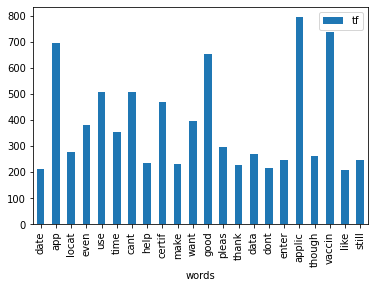

In [ ]:
# Barplot sentimen positif

tf_pos[tf_pos["tf"] > 200].plot.bar(x="words", y="tf")
plt.show()

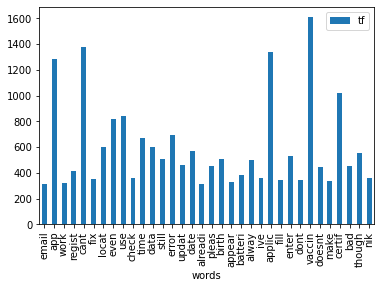

In [ ]:
# Barplot sentimen negatif

tf_neg[tf_neg["tf"] > 310].plot.bar(x="words", y="tf")
plt.show()

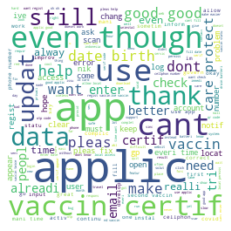

In [ ]:
# Wordcloud sentimen positif

text = " ".join(i for i in visual_pos['content'])
wordcloud = WordCloud(max_font_size=50,
                      max_words=200,
                      background_color="white",width=250, height=250).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('sentimen positif.png', format='png')
plt.show()

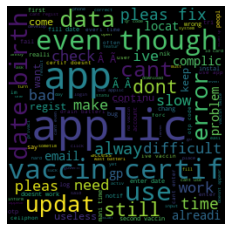

In [ ]:
# Wordcloud sentimen negatif

text = " ".join(i for i in visual_neg['content'])
wordcloud = WordCloud(max_font_size=50,
                      max_words=300,
                      background_color="black",width=250, height=250).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('sentimen negatif.png', format='png')
plt.show()